# Train Test Split <a id="toc"></a>

Thus far we've simply been fitting models to data and calculating the error between various models and the actual data. This can lead to various problems such as overfitting where we overtune our models to these specific data points and fail to disern more generalizable patterns that will apply to future cases. 

Let's look at a few examples of how we could modify some of our algorithms to overfit data:

### Introduction  

Now that you've seen some basic linear regression models it's time to discuss further how to better tune these models. As you saw, we usually begin with an error or loss function for which we'll apply an optimization algorithm such as gradient descent. We then apply this optimization algorithm to the error function we're trying to minimize and voila, we have an optimized solution! Unfortunately, things aren't quite that simple. 

### Overfitting and Underfitting
Most importantly is the issue of generalization.
This is often examined by discussing underfitting and overfitting.
![](./images/overfit_underfit.png)

Recall our main goal when performing regression: we're attempting to find relationships that can generalize to new cases. Generally, the more data that we have the better off we'll be as we can observe more patterns and relationships within that data. However, some of these patterns and relationships may not generalize well to other cases. 

## Let's intentionally overfit some data to see this in demonstration.

### 1. Import the data and define X and Y.

In [1]:
ls

README.md    data/        images/      index.ipynb


In [2]:
import pandas as pd

In [7]:
pd.read_excel('data/movie_data_detailed.xlsx').head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes
0,13000000,25682380,21 &amp; Over,NaN,2008.0,6.8,48.0,206513.0
1,45658735,13414714,Dredd 3D,NaN,2012.0,NaN,NaN,NaN
2,20000000,53107035,12 Years a Slave,NaN,2013.0,8.1,96.0,537525.0
3,61000000,75612460,2 Guns,NaN,2013.0,6.7,55.0,173726.0
4,40000000,95020213,42,NaN,2013.0,7.5,62.0,74170.0


In [6]:
#Import the Data here.
path = 'data/' #The subdirectory where the file is stored
filename = 'movie_data_detailed.xlsx' #The filename
full_path = path + filename #Alternative shortcut

df = pd.read_excel(full_path)
print(len(df))
df.head()

30


,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes
0,13000000,25682380,21 &amp; Over,NaN,2008.0,6.8,48.0,206513.0
1,45658735,13414714,Dredd 3D,NaN,2012.0,NaN,NaN,NaN
2,20000000,53107035,12 Years a Slave,NaN,2013.0,8.1,96.0,537525.0
3,61000000,75612460,2 Guns,NaN,2013.0,6.7,55.0,173726.0
4,40000000,95020213,42,NaN,2013.0,7.5,62.0,74170.0


In [49]:
pwd

'/Users/matthew.mitchell/Documents/Intro_Data_Science/Intro_Data_Science_NYC_Github_Materials/c16_regression/ds-train-test-split-nyc-ds-062518'

In [4]:
cd

/Users/matthew.mitchell


In [5]:
df = pd.read_csv('Downloads/lego_sets.csv')
print(len(df))
df.head()

12261


,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs fr...,75823.0,Use the staircase catapult to launch Red into ...,Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US
1,6-12,19.99,2.0,168.0,4.0,Launch a flying attack and rescue the eggs fro...,75822.0,Pilot Pig has taken off from Bird Island with ...,Easy,Piggy Plane Attack,5.0,Angry Birds™,4.0,US
2,6-12,12.99,11.0,74.0,4.3,Chase the piggy with lightning-fast Chuck and ...,75821.0,Pitch speedy bird Chuck against the Piggy Car....,Easy,Piggy Car Escape,4.3,Angry Birds™,4.1,US
3,12+,99.99,23.0,1032.0,3.6,Explore the architecture of the United States ...,21030.0,Discover the architectural secrets of the icon...,Average,United States Capitol Building,4.6,Architecture,4.3,US
4,12+,79.99,14.0,744.0,3.2,Recreate the Solomon R. Guggenheim Museum® wit...,21035.0,Discover the architectural secrets of Frank Ll...,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,4.1,US


In [1]:
df.head()

NameError: name 'df' is not defined

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
ages                 12261 non-null object
list_price           12261 non-null float64
num_reviews          10641 non-null float64
piece_count          12261 non-null float64
play_star_rating     10486 non-null float64
prod_desc            11884 non-null object
prod_id              12261 non-null float64
prod_long_desc       12261 non-null object
review_difficulty    10206 non-null object
set_name             12261 non-null object
star_rating          10641 non-null float64
theme_name           12258 non-null object
val_star_rating      10466 non-null float64
country              12261 non-null object
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


In [54]:
df.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'prod_desc', 'prod_id', 'prod_long_desc', 'review_difficulty',
       'set_name', 'star_rating', 'theme_name', 'val_star_rating', 'country'],
      dtype='object')

In [8]:
for col in X.columns:
    try:
        mean = df[col].mean()
        df[col] = df[col].fillna(value=mean)
    except:
        #Col is text
        pass

In [9]:
def normalize_func(value):
    output = (value - minimum) / range_
    return output

In [10]:
for col in df.columns:
    try:
        minimum = df[col].min()
        maximum = df[col].max()
        print('{}, Minimum: {}, Maximum: {}'.format(col, minimum, maximum))
        range_ = maximum - minimum
        df[col] = df[col].map(normalize_func)
        print('{}, Minimum: {}, Maximum: {}'.format(col, df[col].min(), df[col].max()))
        print('\n')
    except:
        print('Column {} is probably not numeric.'.format(col))

ages, Minimum: 10+, Maximum: 9-16
Column ages is probably not numeric.
list_price, Minimum: 2.2724, Maximum: 1104.87
list_price, Minimum: 0.0, Maximum: 1.0


num_reviews, Minimum: 1.0, Maximum: 367.0
num_reviews, Minimum: 0.0, Maximum: 1.0


piece_count, Minimum: 1.0, Maximum: 7541.0
piece_count, Minimum: 0.0, Maximum: 1.0


play_star_rating, Minimum: 1.0, Maximum: 5.0
play_star_rating, Minimum: 0.0, Maximum: 1.0


Column prod_desc is probably not numeric.
prod_id, Minimum: 630.0, Maximum: 2000431.0
prod_id, Minimum: 0.0, Maximum: 1.0


prod_long_desc, Minimum: Act out perilous LEGO® Star Wars: The Freemaker Adventures missions with The Arrowhead. This aggressive-looking starship features a lift-off cockpit canopy with space for 3 minifigures and R0-GR inside, a transparent opening dome revealing the ship’s removable crystal power source element, 2 spring-loaded shooters and an impressive flip-out battering ram. There’s also a service cart with tools and ammo as an extra play starter.


In [23]:
X = df[['num_reviews', 'piece_count', 'play_star_rating', 'star_rating', 'val_star_rating']]
y = df.list_price

In [ ]:
df.head()

In [24]:
#Subset the Data into appropriate X and Y features. (X should be multiple features!)
X = df[['budget', 'Year', 'imdbRating', 'Metascore', 'imdbVotes']]
y = df['domgross']

### 2. For each feature in X, create several new columns that are powers of that feature. For example, you could take the $budget$ column and produce another column $budget**2$, a third column $budget**3$, a fourth column $budget**4$ and so on. Do this until you have more columns then rows.

In [9]:
type(X)

pandas.core.frame.DataFrame

In [25]:
X.head(2)

,budget,Year,imdbRating,Metascore,imdbVotes
0,0.034169,0.864865,0.593750,0.294118,0.357377
1,0.182956,0.972973,0.577546,0.433824,0.348404


In [35]:
#Your code here.
#Create additional features using powers until you have more columns then rows.
for col in X.columns:
    for power in range(2,20):
        new_col_name = '{}^{}'.format(col,power)
        X[new_col_name] = X[col].map(lambda x: x**power)
X.head()

,num_reviews,piece_count,play_star_rating,star_rating,val_star_rating,num_reviews^2,num_reviews^3,num_reviews^4,piece_count^2,piece_count^3,...,val_star_rating^4^9^10,val_star_rating^4^9^11,val_star_rating^4^9^12,val_star_rating^4^9^13,val_star_rating^4^9^14,val_star_rating^4^9^15,val_star_rating^4^9^16,val_star_rating^4^9^17,val_star_rating^4^9^18,val_star_rating^4^9^19
0,0.002732,0.036605,0.750,0.84375,0.750,0.000007,2.039655e-08,5.572828e-11,0.001340,4.904709e-05,...,1.052095e-45,3.343954e-50,1.062835e-54,3.378090e-59,1.073685e-63,3.412575e-68,1.084645e-72,3.447412e-77,1.095718e-81,3.482605e-86
1,0.002732,0.022149,0.750,1.00000,0.750,0.000007,2.039655e-08,5.572828e-11,0.000491,1.086514e-05,...,1.052095e-45,3.343954e-50,1.062835e-54,3.378090e-59,1.073685e-63,3.412575e-68,1.084645e-72,3.447412e-77,1.095718e-81,3.482605e-86
2,0.027322,0.009682,0.825,0.78125,0.775,0.000747,2.039655e-05,5.572828e-07,0.000094,9.075165e-07,...,1.408033e-40,1.457049e-44,1.507771e-48,1.560259e-52,1.614574e-56,1.670780e-60,1.728943e-64,1.789130e-68,1.851413e-72,1.915863e-76
3,0.060109,0.136737,0.650,0.87500,0.825,0.003613,2.171825e-04,1.305468e-05,0.018697,2.556595e-03,...,8.383425e-31,8.236897e-34,8.092930e-37,7.951479e-40,7.812501e-43,7.675951e-46,7.541789e-49,7.409971e-52,7.280457e-55,7.153207e-58
4,0.035519,0.098541,0.550,0.87500,0.775,0.001262,4.481122e-05,1.591655e-06,0.009710,9.568688e-04,...,1.408033e-40,1.457049e-44,1.507771e-48,1.560259e-52,1.614574e-56,1.670780e-60,1.728943e-64,1.789130e-68,1.851413e-72,1.915863e-76


In [36]:
print(len(df))

12261


In [21]:
df.head()

,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes
0,13000000,25682380,21 &amp; Over,NaN,2008.0,6.8,48.0,206513.0
1,45658735,13414714,Dredd 3D,NaN,2012.0,NaN,NaN,NaN
2,20000000,53107035,12 Years a Slave,NaN,2013.0,8.1,96.0,537525.0
3,61000000,75612460,2 Guns,NaN,2013.0,6.7,55.0,173726.0
4,40000000,95020213,42,NaN,2013.0,7.5,62.0,74170.0


### 3. Use all of your new features for X. Train a model

In [ ]:
#Your code here


### 4. Plot the model and the actual data on the Budget/Gross Domestic Product plane. (Remember this is just a slice of your n-dimensional space!)

In [ ]:
#Your code here

### 5. What do you notice?

#Your response here 

Note: This box (like all the questions and headers) is formatted in Markdown. See a brief cheat sheet of [markdown syntax here](https://guides.github.com/pdfs/markdown-cheatsheet-online.pdf)!

## Train Test Split

Here lies the theoretical underpinnings for train test split. Essentially, we are trying to gauge the generalization error of our currently tuned model to future cases. (After all, that's the value of predictive models; to predict fturue states or occurences! By initially dividing our data into one set that we will optimize and train our models on, and a second hold out set that we later verify our models on but never tune them against, we can better judge how well our models will generalize to future cases outside of the scope of current observations.

### 6. Split your data (including all of those feature engineered columns) into two sets; train and test. In other words, instead of simply X and respective Y datasets, you will now have 4 subsets: X_train, y_train, X_test, and y_test.

In [14]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

### 7. Train your model on the train set.

In [32]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 8. Evaluate your model on the test set.

In [16]:
def mse(y, y_hat):
    residuals = y_hat - y
    squarred_err = [err**2 for err in residuals]
    return np.mean(squarred_err)

In [34]:
y_hat_test = model.predict(X_test)

In [17]:
import numpy as np

In [37]:
mse(y_test, y_hat_test)

270833.7199525366

In [38]:
y_hat_train = model.predict(X_train)
mse(y_train, y_hat_train)

5.931478918824638e-05

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
print(len(X.columns), X.columns[:5])

20 Index(['budget', 'Year', 'imdbRating', 'Metascore', 'imdbVotes'], dtype='object')


In [20]:
X = X.fillna(value=0)

In [22]:
X.head()

,num_reviews,piece_count,play_star_rating,star_rating,val_star_rating,num_reviews^2,num_reviews^3,num_reviews^4,piece_count^2,piece_count^3,piece_count^4,play_star_rating^2,play_star_rating^3,play_star_rating^4,star_rating^2,star_rating^3,star_rating^4,val_star_rating^2,val_star_rating^3,val_star_rating^4
0,2.0,277.0,4.0,4.5,4.0,4.0,8.0,16.0,76729.0,2.125393e+07,5.887339e+09,16.00,64.000,256.0000,20.25,91.125,410.0625,16.00,64.000,256.0000
1,2.0,168.0,4.0,5.0,4.0,4.0,8.0,16.0,28224.0,4.741632e+06,7.965942e+08,16.00,64.000,256.0000,25.00,125.000,625.0000,16.00,64.000,256.0000
2,11.0,74.0,4.3,4.3,4.1,121.0,1331.0,14641.0,5476.0,4.052240e+05,2.998658e+07,18.49,79.507,341.8801,18.49,79.507,341.8801,16.81,68.921,282.5761
3,23.0,1032.0,3.6,4.6,4.3,529.0,12167.0,279841.0,1065024.0,1.099105e+09,1.134276e+12,12.96,46.656,167.9616,21.16,97.336,447.7456,18.49,79.507,341.8801
4,14.0,744.0,3.2,4.6,4.1,196.0,2744.0,38416.0,553536.0,4.118308e+08,3.064021e+11,10.24,32.768,104.8576,21.16,97.336,447.7456,16.81,68.921,282.5761


In [37]:
train_errors = []
test_errors = []
num_feats = []
for i in range(2,len(X.columns)+1):
    #Subset to select features
    cols_to_use = X.columns[:i]
    X_train_temp = X_train[cols_to_use]
    #Fit a model
    model = LinearRegression()
    model.fit(X_train_temp, y_train)
    #Calculate Train errrors
    y_hat_train = model.predict(X_train_temp)
    train_errors.append(mse(y_train, y_hat_train))
    #Calculate Test errors
    X_test_temp = X_test[cols_to_use]
    y_hat_test = model.predict(X_test_temp)
    test_errors.append(mse(y_test, y_hat_test))
    num_feats.append(i)
plt.scatter(num_feats, train_errors, c='red', label='Train Errors')
plt.scatter(num_feats, test_errors, c='blue', label='Test Errors')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Model Complexity: Number of Features')
plt.ylabel('MSE')

KeyError: "Index(['num_reviews^5'], dtype='object') not in index"

(0, 0.01)

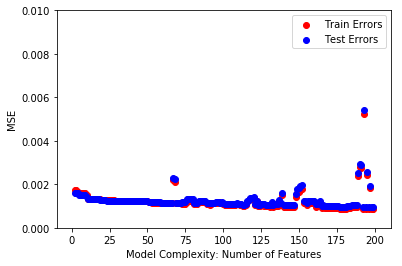

In [39]:
train_errors = []
test_errors = []
num_feats = []
for i in range(2,200):
    #Subset to select features
    cols_to_use = X.columns[:i]
    X_train_temp = X_train[cols_to_use]
    #Fit a model
    model = LinearRegression()
    model.fit(X_train_temp, y_train)
    #Calculate Train errrors
    y_hat_train = model.predict(X_train_temp)
    train_errors.append(mse(y_train, y_hat_train))
    #Calculate Test errors
    X_test_temp = X_test[cols_to_use]
    y_hat_test = model.predict(X_test_temp)
    test_errors.append(mse(y_test, y_hat_test))
    num_feats.append(i)
plt.scatter(num_feats, train_errors, c='red', label='Train Errors')
plt.scatter(num_feats, test_errors, c='blue', label='Test Errors')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Model Complexity: Number of Features')
plt.ylabel('MSE')
plt.ylim(0, 0.01)

(0, 0.01)

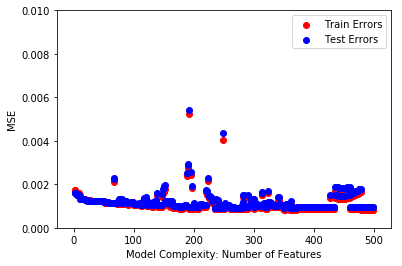

In [40]:
train_errors = []
test_errors = []
num_feats = []
for i in range(2,500):
    #Subset to select features
    cols_to_use = X.columns[:i]
    X_train_temp = X_train[cols_to_use]
    #Fit a model
    model = LinearRegression()
    model.fit(X_train_temp, y_train)
    #Calculate Train errrors
    y_hat_train = model.predict(X_train_temp)
    train_errors.append(mse(y_train, y_hat_train))
    #Calculate Test errors
    X_test_temp = X_test[cols_to_use]
    y_hat_test = model.predict(X_test_temp)
    test_errors.append(mse(y_test, y_hat_test))
    num_feats.append(i)
plt.scatter(num_feats, train_errors, c='red', label='Train Errors')
plt.scatter(num_feats, test_errors, c='blue', label='Test Errors')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Model Complexity: Number of Features')
plt.ylabel('MSE')
plt.ylim(0, 0.01)

In [ ]:
train_errors = []
test_errors = []
num_feats = []
for i in range(2,2000):
    #Subset to select features
    cols_to_use = X.columns[:i]
    X_train_temp = X_train[cols_to_use]
    #Fit a model
    model = LinearRegression()
    model.fit(X_train_temp, y_train)
    #Calculate Train errrors
    y_hat_train = model.predict(X_train_temp)
    train_errors.append(mse(y_train, y_hat_train))
    #Calculate Test errors
    X_test_temp = X_test[cols_to_use]
    y_hat_test = model.predict(X_test_temp)
    test_errors.append(mse(y_test, y_hat_test))
    num_feats.append(i)
plt.scatter(num_feats, train_errors, c='red', label='Train Errors')
plt.scatter(num_feats, test_errors, c='blue', label='Test Errors')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Model Complexity: Number of Features')
plt.ylabel('MSE')
plt.ylim(0, 0.01)

## Bonus:   
### Iterate over training size sets from 5%-95% of the total sample size and calculate both the training error (minimized rss) and the test error (rss) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph. 